Social Media Sentiment Analysis - Exploration Notebook
Data loaded: 20 records
Columns: ['post_id', 'user_id', 'platform', 'sentiment', 'content', 'hashtags', 'retweets', 'likes', 'country', 'timestamp', 'created_year', 'created_month', 'created_day', 'created_hour']

First 5 rows:


,post_id,user_id,platform,sentiment,content,hashtags,retweets,likes,country,timestamp,created_year,created_month,created_day,created_hour
0,1,user_001,Twitter,Positive,Great product! Loving the new features,#tech #innovation,120,450,USA,2024-01-15 09:30:00,2024,1,15,9
1,2,user_002,Instagram,Negative,Service was terrible today,#disappointed #badservice,5,12,UK,2024-01-15 14:15:00,2024,1,15,14
2,3,user_003,Facebook,Neutral,Just sharing some updates,#news,45,89,Canada,2024-01-16 11:45:00,2024,1,16,11
3,4,user_004,Twitter,Positive,Amazing customer support!,#happy #satisfied,230,780,USA,2024-01-16 16:30:00,2024,1,16,16
4,5,user_005,Instagram,Negative,Product stopped working after 2 days,#frustrated #broken,15,30,Australia,2024-01-17 10:00:00,2024,1,17,10



Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   post_id        20 non-null     int64 
 1   user_id        20 non-null     object
 2   platform       20 non-null     object
 3   sentiment      20 non-null     object
 4   content        20 non-null     object
 5   hashtags       20 non-null     object
 6   retweets       20 non-null     int64 
 7   likes          20 non-null     int64 
 8   country        20 non-null     object
 9   timestamp      20 non-null     object
 10  created_year   20 non-null     int64 
 11  created_month  20 non-null     int64 
 12  created_day    20 non-null     int64 
 13  created_hour   20 non-null     int64 
dtypes: int64(7), object(7)
memory usage: 2.3+ KB
None

Numerical Statistics:
        post_id    retweets        likes  created_year  created_month  \
count  20.00000   20.000000    20.000000      

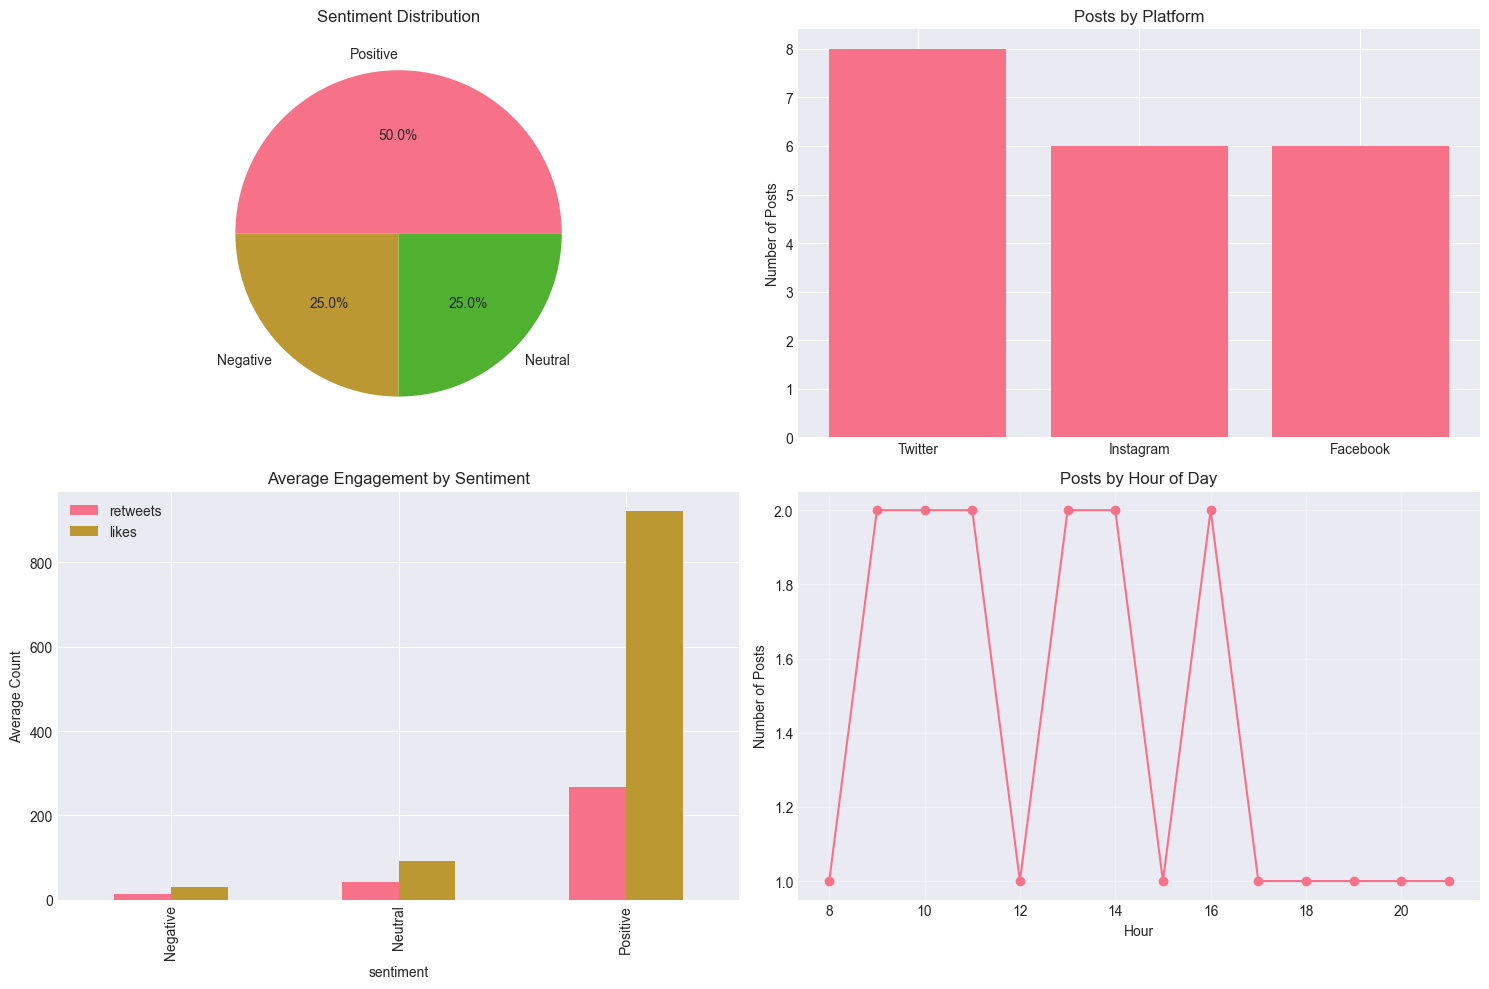


Exploratory analysis complete!
Check visualizations in: ../reports/visualizations/


In [2]:
# Save this as notebooks/data_exploration.py first, then run:
# jupyter notebook
# And create a new notebook with this code

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import sqlite3
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("Social Media Sentiment Analysis - Exploration Notebook")
print("=" * 60)

# Load data
data_path = Path("../data/raw/social_media_data.csv")
df = pd.read_csv(data_path)

print(f"Data loaded: {len(df)} records")
print(f"Columns: {list(df.columns)}")

# Display first few rows
print("\nFirst 5 rows:")
display(df.head())

# Basic info
print("\nData Info:")
print(df.info())

# Describe numerical columns
print("\nNumerical Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Sentiment distribution
print("\nSentiment Distribution:")
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Sentiment pie chart
axes[0, 0].pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
axes[0, 0].set_title('Sentiment Distribution')

# 2. Platform bar chart
platform_counts = df['platform'].value_counts()
axes[0, 1].bar(platform_counts.index, platform_counts.values)
axes[0, 1].set_title('Posts by Platform')
axes[0, 1].set_ylabel('Number of Posts')

# 3. Engagement by sentiment
engagement_by_sentiment = df.groupby('sentiment')[['retweets', 'likes']].mean()
engagement_by_sentiment.plot(kind='bar', ax=axes[1, 0])
axes[1, 0].set_title('Average Engagement by Sentiment')
axes[1, 0].set_ylabel('Average Count')

# 4. Hourly distribution
if 'created_hour' in df.columns:
    hourly_counts = df['created_hour'].value_counts().sort_index()
    axes[1, 1].plot(hourly_counts.index, hourly_counts.values, marker='o')
    axes[1, 1].set_title('Posts by Hour of Day')
    axes[1, 1].set_xlabel('Hour')
    axes[1, 1].set_ylabel('Number of Posts')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/visualizations/exploratory_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("\nExploratory analysis complete!")
print("Check visualizations in: ../reports/visualizations/")